In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE  = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Tomato_Disease_classification",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 4496 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
class_names

['.ipynb_checkpoints',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [6]:
len(dataset)

141

(32, 256, 256, 3)


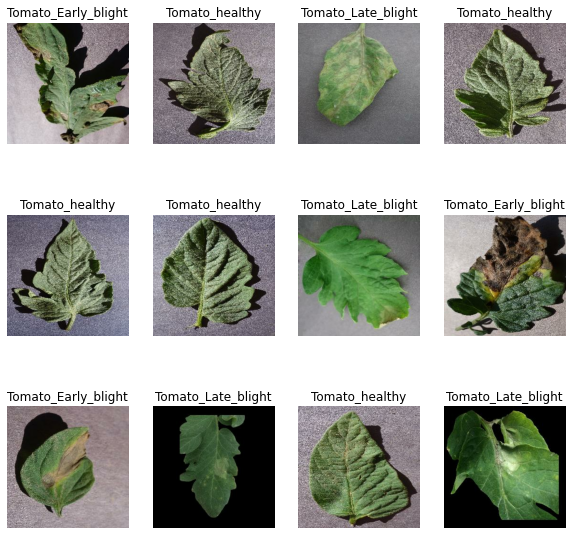

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    print(image_batch.shape)


In [8]:
len(dataset)

141

In [9]:
#80% ==> training
#20% ==> 10% => validation, 10% => test

In [10]:
train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [11]:
train_ds = dataset.take(112)
len(train_ds)

112

In [12]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [13]:
val_size = 0.1
len(dataset)*val_size

14.100000000000001

In [14]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [15]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [16]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
   
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)

112

In [19]:
len(val_ds)

14

In [20]:
len(test_ds)

15

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [34]:
input_size = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape = input_size)

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [36]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
112/112 [==============================] - 489s 4s/step - loss: 1.0255 - accuracy: 0.4765 - val_loss: 0.7647 - val_accuracy: 0.7545
Epoch 2/10
112/112 [==============================] - 464s 4s/step - loss: 0.5712 - accuracy: 0.7688 - val_loss: 0.4170 - val_accuracy: 0.8103
Epoch 3/10
112/112 [==============================] - 481s 4s/step - loss: 0.3987 - accuracy: 0.8321 - val_loss: 0.4273 - val_accuracy: 0.8304
Epoch 4/10
112/112 [==============================] - 479s 4s/step - loss: 0.3904 - accuracy: 0.8391 - val_loss: 0.5752 - val_accuracy: 0.7746
Epoch 5/10
112/112 [==============================] - 471s 4s/step - loss: 0.3001 - accuracy: 0.8753 - val_loss: 0.3252 - val_accuracy: 0.8661
Epoch 6/10
112/112 [==============================] - 983s 9s/step - loss: 0.2663 - accuracy: 0.8927 - val_loss: 0.2434 - val_accuracy: 0.8884
Epoch 7/10
112/112 [==============================] - 461s 4s/step - loss: 0.2464 - accuracy: 0.9027 - val_loss: 0.2518 - val_accuracy: 0.9062

In [38]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 15s 386ms/step - loss: 0.2597 - accuracy: 0.9021


In [39]:
scores

[0.2597179114818573, 0.9020833373069763]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 112}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
len(history.history['accuracy'])

10

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

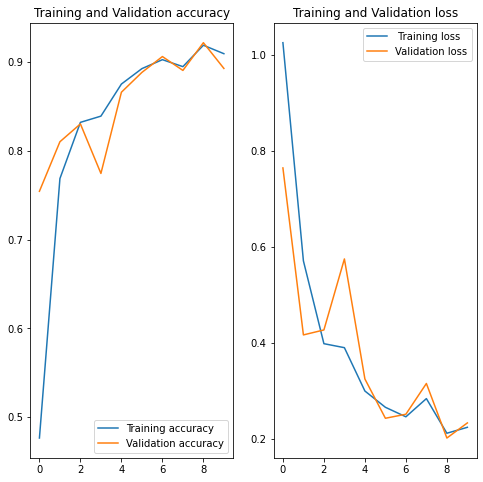

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = "Training accuracy")
plt.plot(range(EPOCHS),val_acc,label = "Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = " Training loss")
plt.plot(range(EPOCHS),val_loss,label = "Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation loss")
plt.show()

First image to predict
Image's actual label : Tomato_Early_blight
1/1 [==============================] - 0s 438ms/step
Predicted label : Tomato_Early_blight


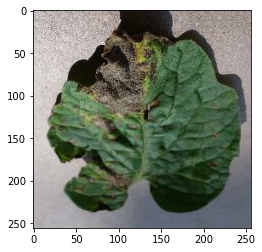

In [98]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Image's actual label :", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label :",class_names[np.argmax(batch_prediction[0])])

In [100]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 100ms/step


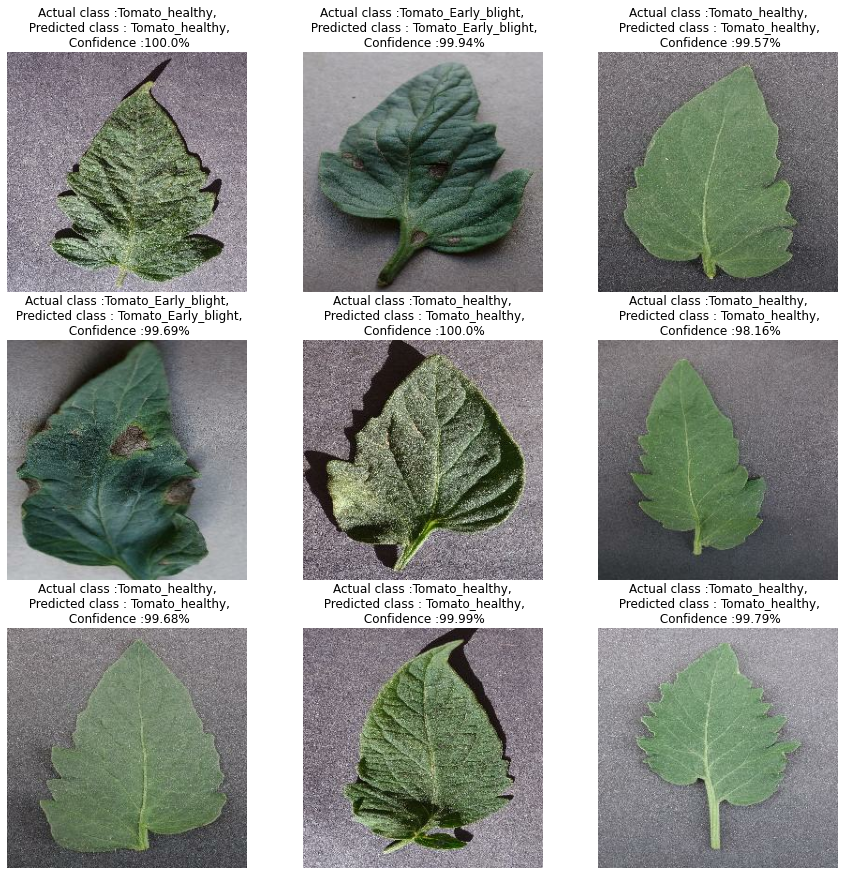

In [113]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual class :{actual_class},\n Predicted class : {predicted_class},\n Confidence :{confidence}%")
        plt.axis("off")

In [111]:
model_version = 1
model.save(f"C:/Tomato_Disease_classification/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Tomato_Disease_classification/models/1\assets


INFO:tensorflow:Assets written to: C:/Tomato_Disease_classification/models/1\assets


In [110]:
import os
os.listdir("C:/Tomato_Disease_classification/models/")

['1']

^C
Note: you may need to restart the kernel to use updated packages.
